In [1]:
import nbimporter
import numpy as np
import random
import time
import math

from chromosome import Chromosome
from evol_manager_s1 import EvolManager

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def __init__(  
> self,  
        genes_per_chrom,  
        pop,  
        generations,  
        reproductive_pool_size = None,  
        offspring = None,  
        mutation_rate = 0.2,  
        reproductive_coefficient = 1 / 3,
        ):

# Fitness distribution

## Initial distribution

In [2]:
evol_manager = EvolManager(
    genes_per_chrom = 12, 
    pop = 1000, 
    generations = 200, 
    reproductive_pool_size = None,
    offspring = 500)


It's populated over here!


In [3]:
chromosomes = evol_manager.get_chrom_array()

In [4]:
df = pd.DataFrame([], columns = ['generation', 'positions', 'fitness'])
df

for c, chro in enumerate(chromosomes):
    df.loc[ c ] = [0, chro.get_positions(), chro.fitness()]

df.head()

,generation,positions,fitness
0,0,"[0, 3, 11, 5, 1, 4, 2, 8, 6, 9, 10, 7]",0.893939
1,0,"[0, 11, 9, 8, 7, 4, 2, 5, 10, 6, 1, 3]",0.893939
2,0,"[3, 5, 0, 2, 7, 4, 9, 8, 11, 6, 1, 10]",0.803030
3,0,"[3, 0, 2, 11, 1, 4, 10, 8, 9, 7, 6, 5]",0.878788
4,0,"[5, 0, 7, 9, 11, 4, 2, 3, 8, 1, 6, 10]",0.848485


In [5]:
df.describe()

,generation,fitness
count,1000.0,1000.000000
mean,0.0,0.884106
std,0.0,0.041019
min,0.0,0.666667
25%,0.0,0.863636
50%,0.0,0.893939
75%,0.0,0.909091
max,0.0,0.984848


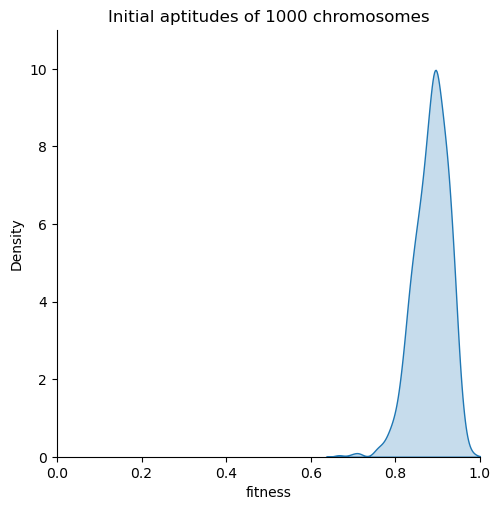

In [6]:
sns.displot(df, x="fitness", 
    kind="kde", 
    fill=True).set(title='Initial aptitudes of 1000 chromosomes',
        xlim = (0, 1),
        ylim = (0, 11))
plt.show()


## Final distribution

In [7]:
evol_manager.greedy_evolution()

It's populated over here!
Current generation: 0
Current generation: 1
Current generation: 2
Current generation: 3
SOLUTION FOUND: [ 2  8  3  1  7 10  6 11  0  4  9  5] Current generation: 4
SOLUTION FOUND: [ 2  8  3  1  7 10  6 11  0  4  9  5] SOLUTION FOUND: [ 2  8  3  1  7 10  6 11  0  4  9  5] SOLUTION FOUND: [ 2  8  3  1  7 10  6 11  0  4  9  5] Time for first solution:
0.9932239720001235
Current generation: 5
Current generation: 6
Current generation: 7
Current generation: 8
SOLUTION FOUND: [ 4  6  0  9  7  5  3  1 10  8 11  2] Current generation: 9
SOLUTION FOUND: [ 4  6  0  9  7  5  3  1 10  8 11  2] SOLUTION FOUND: [ 4  6  0  9  7  5  3  1 10  8 11  2] SOLUTION FOUND: [ 4  6  0  9  7  5  3  1 10  8 11  2] Time for new solution: 2.267355176001729
SOLUTION FOUND: [ 4  6  0  9  7  5  3  1 10  8 11  2] SOLUTION FOUND: [ 4  6  0  9  7  5  3  1 10  8 11  2] Current generation: 10
Current generation: 11
Current generation: 12
SOLUTION FOUND: [ 4 11  7  3 10  0  5  1  9  6  8  2] SOLUTI

In [8]:
evol_manager.show_solutions()

Solutions: 
solution [0]: [ 2  8  3  1  7 10  6 11  0  4  9  5]. Generation: 4 Time: 0.9932239720001235
solution [1]: [ 4  6  0  9  7  5  3  1 10  8 11  2]. Generation: 9 Time: 2.267355176001729
solution [2]: [ 4 11  7  3 10  0  5  1  9  6  8  2]. Generation: 13 Time: 3.2188372610035003
solution [3]: [ 2  8  3  0  7  9 11  6  4  1 10  5]. Generation: 13 Time: 3.2190608529999736
solution [4]: [ 2  8 11  7  3  1  9  5  0 10  4  6]. Generation: 17 Time: 4.201937922996876
solution [5]: [ 3 11  4  7 10  0  5  1  9  6  8  2]. Generation: 18 Time: 4.435446187002526
solution [6]: [ 3  5  8 11  0  4  6  1 10  2  7  9]. Generation: 19 Time: 4.694218044998706
solution [7]: [ 2  6  9 11  4  8  0  3  1  7  5 10]. Generation: 21 Time: 5.196176297002239
solution [8]: [ 2  7  3  8 11  4  0 10  5  1  6  9]. Generation: 22 Time: 5.447527336997155
solution [9]: [ 2  5 10  1 11  4  7  0  3  9  6  8]. Generation: 24 Time: 5.9324070869988645
solution [10]: [ 4 11  1 10  7  3  8  2  9  6  0  5]. Generation: 

In [13]:
final_chromosomes = evol_manager.get_chrom_array()

In [14]:
df_final = pd.DataFrame([], columns = ['generation', 'positions', 'fitness'])
df_final

for c, chro in enumerate(chromosomes):
    df_final.loc[ c ] = [0, chro.get_positions(), chro.fitness()]

df_final.head()

,generation,positions,fitness
0,0,"[0, 3, 5, 10, 1, 4, 11, 8, 9, 7, 6, 2]",0.939394
1,0,"[0, 3, 4, 5, 7, 8, 6, 1, 9, 11, 10, 2]",0.803030
2,0,"[1, 5, 7, 9, 3, 8, 0, 10, 6, 11, 2, 4]",0.954545
3,0,"[1, 9, 4, 7, 6, 11, 8, 0, 10, 5, 2, 3]",0.803030
4,0,"[0, 6, 11, 10, 9, 8, 2, 7, 1, 3, 5, 4]",0.848485


In [15]:
df_final.describe()

,generation,fitness
count,1000.0,1000.000000
mean,0.0,0.883091
std,0.0,0.044246
min,0.0,0.606061
25%,0.0,0.863636
50%,0.0,0.893939
75%,0.0,0.909091
max,0.0,0.984848


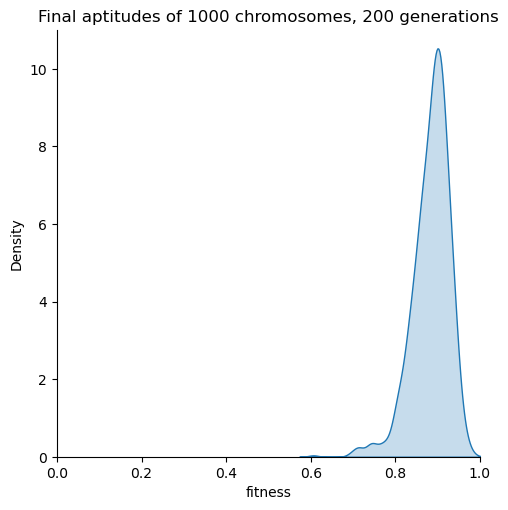

In [16]:
sns.displot(df_final['fitness'], #, x="fitness", 
    kind="kde",
    fill=True).set(title='Final aptitudes of 1000 chromosomes, 200 generations',
        xlim = (0, 1),
        ylim = (0, 11))

plt.show()